In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1500

In [3]:
df = pd.read_excel('C:/Users/Anastasiya.Mittseva/PycharmProjects/ProjectPredictSolidity/prepared_data.xlsx')

In [4]:
df.head()

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,%А остаточный,HV,HRC
0,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,0.11,NaN,NaN,NaN,NaN,NaN,180.0,NaN
1,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,0.31,NaN,NaN,NaN,NaN,NaN,180.0,NaN
2,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,1.00,NaN,NaN,NaN,NaN,NaN,180.0,NaN
3,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,3.40,NaN,NaN,NaN,NaN,NaN,195.0,NaN
4,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,7.00,NaN,NaN,NaN,NaN,NaN,200.0,NaN


## Подготовка данных

In [5]:
def convertHRCtoHV(x):
    y = 0.0001076546813696400 * x ** 4 - 0.01404920211793480 * x ** 3 + 0.7989548243359580 * x ** 2 - 13.82475417563670 * x + 289.8692821768870
    return y

In [6]:
def repl(x):
    if np.isnan(x):
        return round(convertHRCtoHV(df['HRC'].loc[x.index]),2)
    else:
        return x

In [7]:
df['HRC'] = df['HRC'].map(convertHRCtoHV)

In [8]:
df['HV'] = df['HV'].combine_first(df['HRC'])

In [9]:
df = df.drop('HRC',1)

In [10]:
df = df.fillna(0)

In [11]:
df = df[~(df['HV'] == 0.0)]

In [12]:
df = df.drop(df[df['%А остаточный'] != 0].index)

In [13]:
df = df.drop('%А остаточный',1)

In [14]:
df = df[~(df['V800-500 °C/c']== 0.0)]

In [15]:
# df = df.drop(df[(df['%Ф']+df['%П']+df['%Б']+df['%М']) != 100].index)

In [16]:
df = df.reset_index()

In [17]:
df = df.drop('index',1)

In [18]:
df.head()

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,HV
0,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,0.11,0.0,0.0,0.0,0.0,180.0
1,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,0.31,0.0,0.0,0.0,0.0,180.0
2,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,1.00,0.0,0.0,0.0,0.0,180.0
3,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,3.40,0.0,0.0,0.0,0.0,195.0
4,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,7.00,0.0,0.0,0.0,0.0,200.0


## Графики 

In [19]:
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

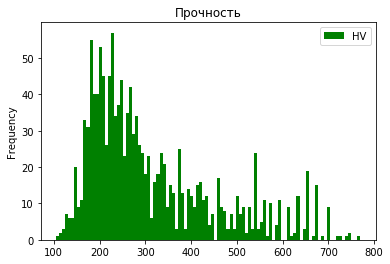

In [20]:
df.plot(y='HV', kind='hist', color='green', title='Прочность', bins=100)
plt.show()

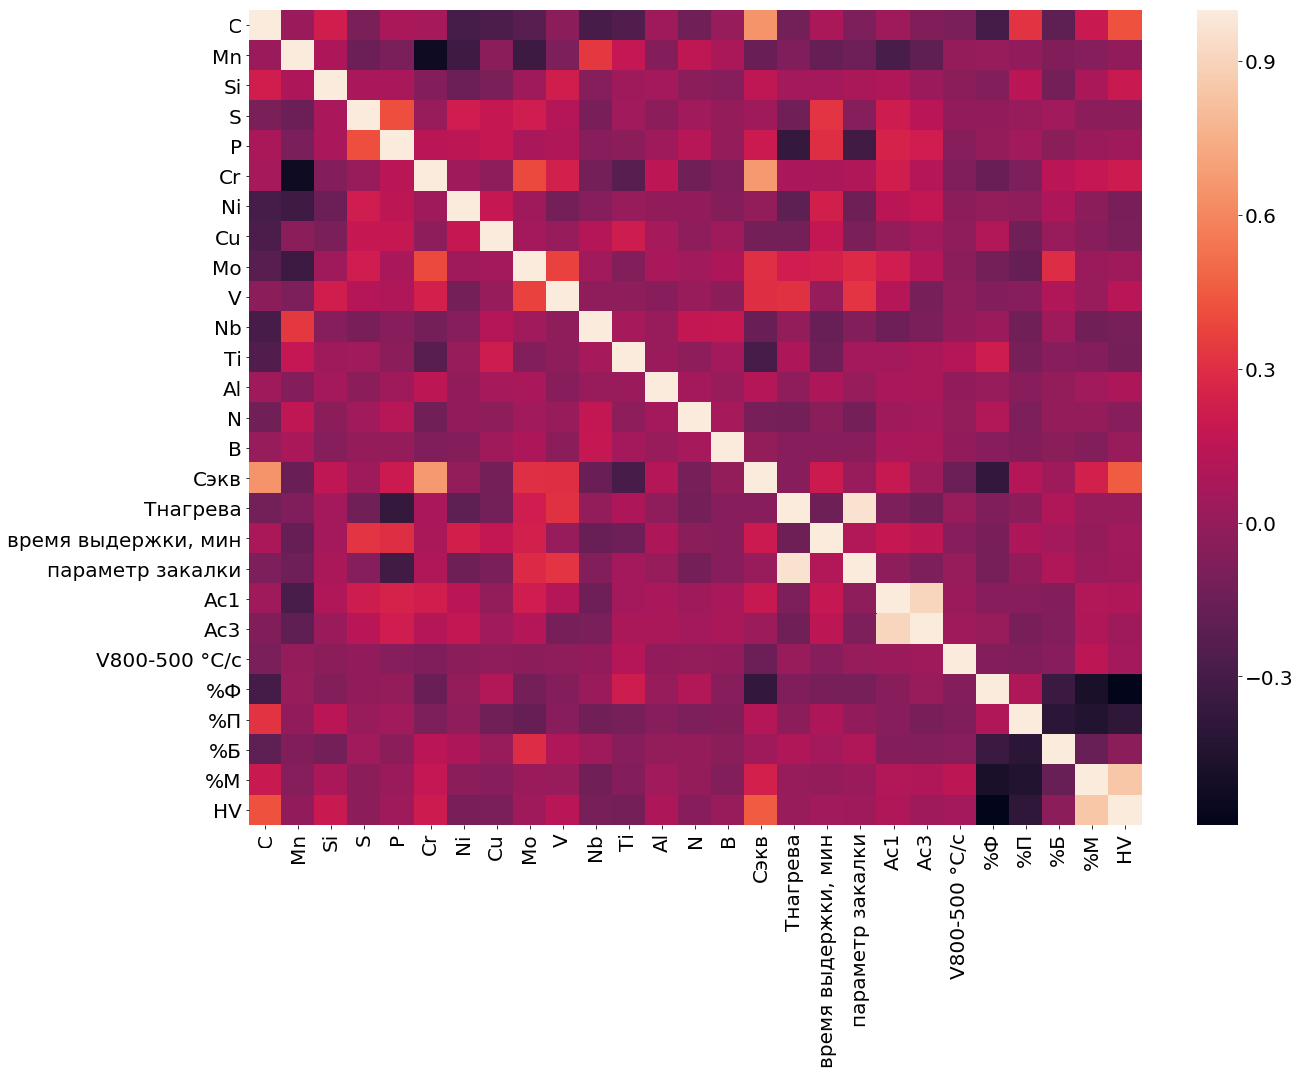

In [21]:
plt.rcParams.update({'font.size': 20})
plt.subplots(figsize=(20,15))

corr = df.corr()
corr_hm = sns.heatmap(corr)
fig = corr_hm.get_figure()

In [22]:
df_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti',
       'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']

In [23]:
ls_targets = ['HV']

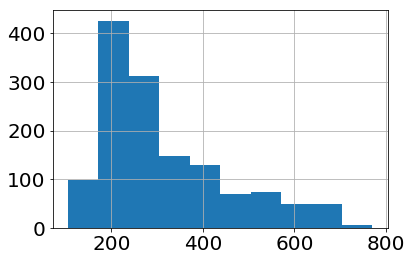

In [24]:
df['HV'].hist()

In [25]:
df[df_col+ ls_targets].corr()

,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,B,Сэкв,параметр закалки,V800-500 °C/c,HV
С,1.000000,0.022486,0.226186,-0.091789,0.074458,0.066421,-0.293022,-0.271731,-0.218786,-0.026575,-0.291048,-0.258283,0.033419,-0.131445,0.008125,0.650007,-0.085640,-0.098997,0.425368
Mn,0.022486,1.000000,0.092524,-0.149970,-0.099112,-0.532124,-0.325844,-0.040339,-0.337657,-0.081249,0.340137,0.177612,-0.061887,0.159054,0.083250,-0.161628,-0.140595,0.001943,-0.010261
Si,0.226186,0.092524,1.000000,0.070160,0.069809,-0.058847,-0.152401,-0.087445,0.036406,0.223461,-0.051293,0.039168,0.054298,-0.034248,-0.052124,0.155483,0.074988,-0.026737,0.195618
S,-0.091789,-0.149970,0.070160,1.000000,0.415353,0.013051,0.220481,0.182515,0.219449,0.121545,-0.104292,0.049143,-0.033793,0.043601,0.000728,0.035054,-0.053775,-0.009946,-0.034066
P,0.074458,-0.099112,0.069809,0.415353,1.000000,0.138013,0.153027,0.184786,0.074141,0.095546,-0.048596,-0.032777,0.031337,0.127690,0.003482,0.201159,-0.312487,-0.052985,0.034932
Cr,0.066421,-0.532124,-0.058847,0.013051,0.138013,1.000000,0.042485,-0.022534,0.393271,0.239077,-0.117373,-0.221517,0.149413,-0.127546,-0.076169,0.665919,0.100892,-0.075095,0.209738
Ni,-0.293022,-0.325844,-0.152401,0.220481,0.153027,0.042485,1.000000,0.180683,0.035467,-0.117940,-0.050288,0.006475,-0.012271,-0.007724,-0.057017,-0.001815,-0.145081,-0.034893,-0.100336
Cu,-0.271731,-0.040339,-0.087445,0.182515,0.184786,-0.022534,0.180683,1.000000,0.058182,0.008497,0.111958,0.216905,0.063091,-0.020856,0.030745,-0.115784,-0.088841,-0.018248,-0.099034
Mo,-0.218786,-0.337657,0.036406,0.219449,0.074141,0.393271,0.035467,0.058182,1.000000,0.377756,0.047911,-0.067611,0.072511,0.047594,0.089622,0.308417,0.283925,-0.035070,0.041264
V,-0.026575,-0.081249,0.223461,0.121545,0.095546,0.239077,-0.117940,0.008497,0.377756,1.000000,-0.017463,-0.023698,-0.043936,0.015953,-0.035512,0.300880,0.324373,-0.016673,0.132291


In [26]:
df[df_col].corrwith(df['HV'])

С                   0.425368
Mn                 -0.010261
Si                  0.195618
S                  -0.034066
P                   0.034932
Cr                  0.209738
Ni                 -0.100336
Cu                 -0.099034
Mo                  0.041264
V                   0.132291
Nb                 -0.108961
Ti                 -0.114314
Al                  0.087807
N                  -0.047175
B                   0.013651
Сэкв                0.454267
параметр закалки    0.040503
V800-500 °C/c       0.050479
dtype: float64

## train_test_split 

In [41]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

rfr = RandomForestRegressor(max_features = 10, max_depth = 15, min_samples_leaf = 2, n_estimators=100, criterion='mse')

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [42]:
x_train,  x_test,  y_train,  y_test  =  train_test_split (x, y, test_size=0.3)

In [43]:
rfr.fit(x_train, y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [44]:
test_scr, test_r2, test_mae, test_mse, test_corr = print_and_return_score(x_test, y_test, rfr)

Score:  0.88
R^2:  0.88
MAE:  30.62
MSE:  2171.83
Correlation  0.94


In [45]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, rfr)

Score:  0.89
R^2:  0.89
MAE:  29.31
MSE:  2058.56
Correlation  0.94


In [46]:
y_predict_test = rfr.predict(x_test)

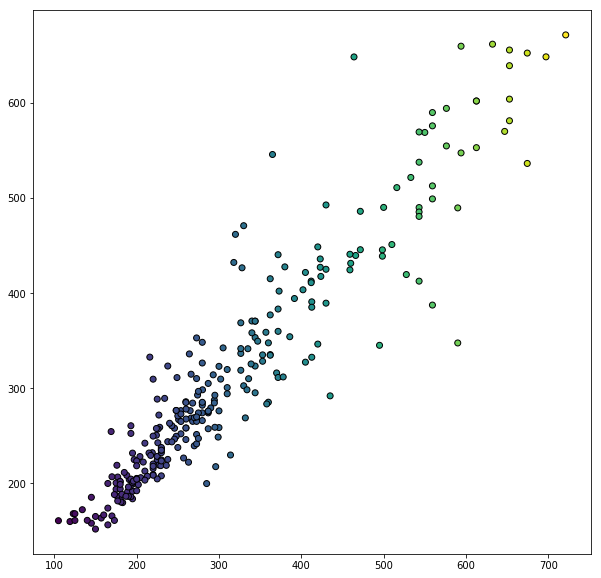

In [47]:
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

In [48]:
y_predict_valid = rfr.predict(x_valid)

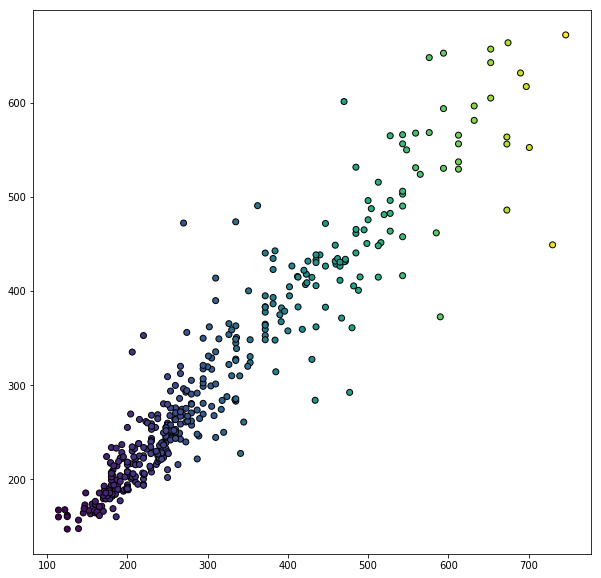

In [49]:
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [41]:
filename = 'model_RFR_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(test_corr) + '_test_r2_' + str(test_r2) + '_train_test_split.sav'
pickle.dump(rfr, open(filename, 'wb'))

##  KFold

In [27]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

rfr = RandomForestRegressor(max_features = 12, max_depth = 15, min_samples_leaf = 1, n_estimators=200, criterion='mse')

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [28]:
kfold = model_selection.KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kfold.split(x, y):
    x_train, y_train = x.iloc[train], y.iloc[train]
    x_test, y_test = x.iloc[test], y.iloc[test]
    rfr.fit(x_train, y_train)
    
    scores.append(print_and_return_score(x_test, y_test, rfr))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.9
R^2:  0.9
MAE:  30.05
MSE:  2255.42
Correlation  0.95


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.92
R^2:  0.92
MAE:  26.37
MSE:  1663.65
Correlation  0.96


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.9
R^2:  0.9
MAE:  30.25
MSE:  2306.85
Correlation  0.95


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.9
R^2:  0.9
MAE:  26.9
MSE:  1897.46
Correlation  0.95


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.92
R^2:  0.92
MAE:  26.35
MSE:  1604.47
Correlation  0.96


In [29]:
listScore = []
for i in range(5):
    tmp = []
    for j in range(5):
        tmp.append(scores[j][i])
    listScore.append(round(np.mean(tmp), 2))
    print(round(np.mean(tmp), 2))

0.91
0.91
27.98
1945.57
0.95


In [30]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, rfr)

Score:  0.9
R^2:  0.9
MAE:  26.43
MSE:  1700.26
Correlation  0.95


In [31]:
y_predict = rfr.predict(x_test)

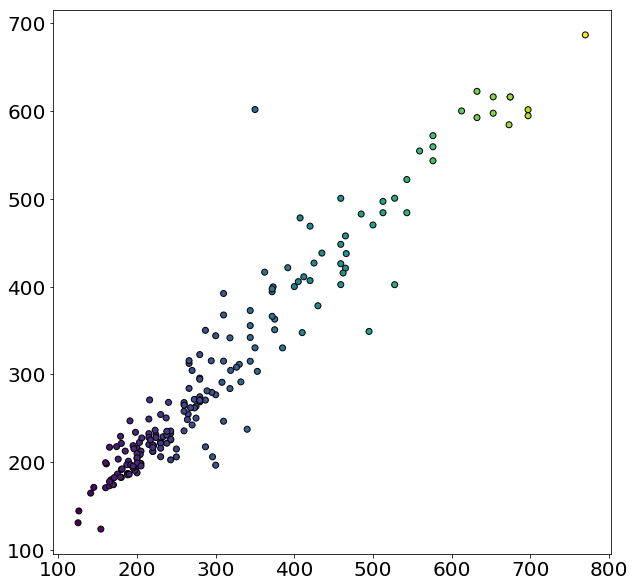

In [32]:
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

In [33]:
y_predict = rfr.predict(x_valid)

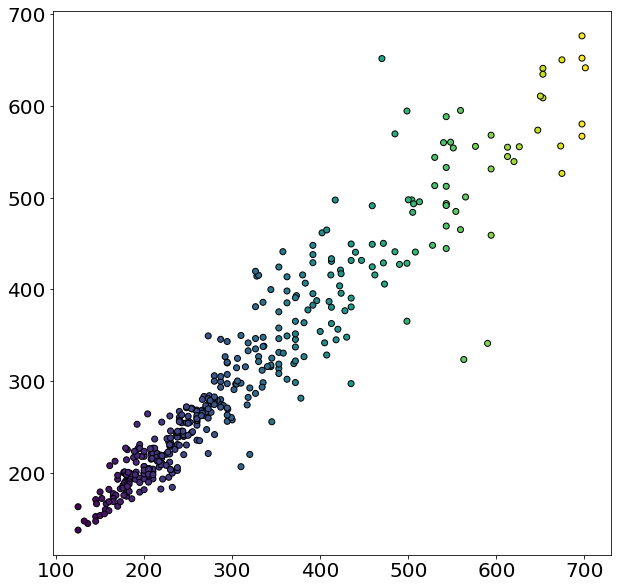

In [34]:
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [35]:
y_predict_to_dataframe = pd.DataFrame({'y_predict': y_predict})

In [37]:
 result = pd.merge(x_valid, y_valid, left_index=True, right_index=True)

In [38]:
result

,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,B,Сэкв,параметр закалки,V800-500 °C/c,HV
441,0.190,0.550,0.30,0.0100,0.018,0.81,1.52,0.20,0.09,0.020,0.000,0.0000,0.000,0.000,0.000,0.580333,834.433616,3.33000,242.715651
1101,0.110,0.500,0.30,0.0050,0.017,0.64,1.59,0.31,0.10,0.030,0.000,0.0000,0.000,0.000,0.000,0.474000,907.301356,0.48000,145.000000
1259,0.290,0.780,0.24,0.0090,0.011,1.49,1.62,0.16,0.44,0.000,0.000,0.0100,0.000,0.000,0.000,0.924667,834.433616,0.19000,412.697272
582,0.220,1.700,0.52,0.0000,0.000,0.05,0.00,0.00,0.00,0.060,0.060,0.0000,0.000,0.000,0.000,0.537333,886.375350,40.00000,386.000000
1004,0.330,1.120,0.30,0.0270,0.018,0.11,0.24,0.19,0.04,0.000,0.000,0.0000,0.010,0.000,0.000,0.575333,850.000000,3.50000,208.000000
764,0.160,1.120,0.22,0.0000,0.000,0.99,0.00,0.00,0.00,0.000,0.000,0.0000,0.000,0.000,0.000,0.544667,995.692389,6.50000,268.000000
984,0.500,0.800,0.32,0.0220,0.017,1.04,0.11,0.17,0.24,0.010,0.000,0.0000,0.000,0.000,0.000,0.910000,810.626512,1.54000,543.055389
225,0.330,1.120,0.30,0.0270,0.018,0.11,0.24,0.19,0.04,0.000,0.000,0.0000,0.010,0.000,0.000,0.575333,850.000000,0.13000,178.000000
792,0.300,0.640,0.22,0.0000,0.000,1.01,0.11,0.19,0.24,0.000,0.000,0.0000,0.000,0.000,0.000,0.676667,810.626512,0.04500,200.000000
773,0.220,0.640,0.25,0.0000,0.000,0.97,0.33,0.16,0.23,0.000,0.000,0.0000,0.000,0.000,0.000,0.599333,833.886039,0.73000,200.000000


In [39]:
y_valid_to_dataframe = result.reset_index()

In [40]:
 result = pd.merge(y_valid_to_dataframe, y_predict_to_dataframe, left_index=True, right_index=True)

In [43]:
result2 = pd.merge(result, df, on = ['HV', 'V800-500 °C/c','параметр закалки'])

In [45]:
result2.to_excel('2.xlsx')

In [80]:
result.to_excel('predict_valid_HV_with_cols.xlsx')

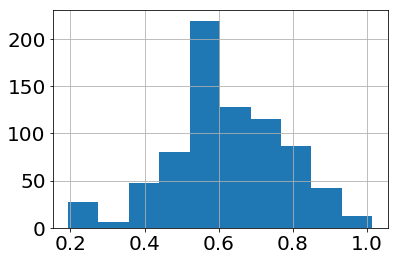

In [147]:
x_train['Сэкв'].hist()

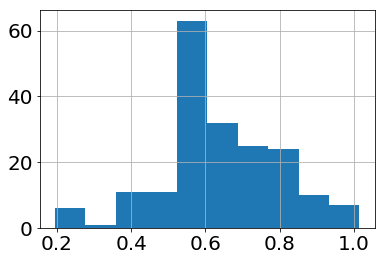

In [148]:
x_test['Сэкв'].hist()

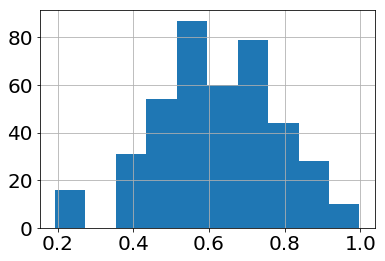

In [149]:
x_valid['Сэкв'].hist()

In [150]:
filename = 'model_RFR_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(listScore[4]) + '_test_r2_' + str(listScore[1]) + '_K_fold.sav'
pickle.dump(rfr, open(filename, 'wb'))

## GridSearchCV

In [102]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [103]:
param_grid = {
    'max_depth': range(6, 18, 2),
    'max_features': range(6, 18, 2),
    'min_samples_leaf': range(1, 5),
    'n_estimators': range(50, 300, 50)
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='neg_mean_absolute_error')

In [104]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  3.4min finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(6, 18, 2), 'max_features': range(6, 18, 2), 'min_samples_leaf': range(1, 5), 'n_estimators': range(50, 300, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=2)

In [105]:
grid_search.best_params_

{'max_depth': 16,
 'max_features': 14,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [106]:
test_scr, test_r2, test_mae, test_mse, test_corr = print_and_return_score(x_test, y_test, grid_search)

Score:  -25.87
R^2:  0.9
MAE:  25.87
MSE:  1735.54
Correlation  0.95


In [107]:
y_predict_test = grid_search.predict(x_test)

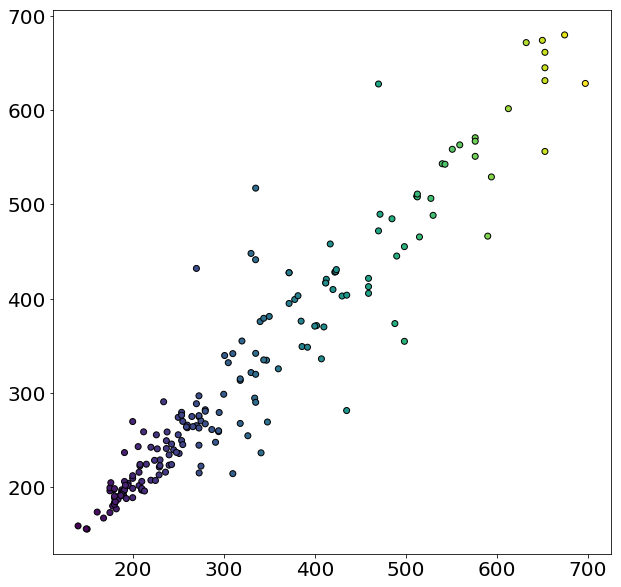

In [108]:
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
# plt.colorbar()
plt.show()

In [109]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr  = print_and_return_score(x_valid, y_valid, grid_search)

Score:  -20.03
R^2:  0.94
MAE:  20.03
MSE:  1135.63
Correlation  0.97


In [110]:
y_predict_valid = grid_search.predict(x_valid)

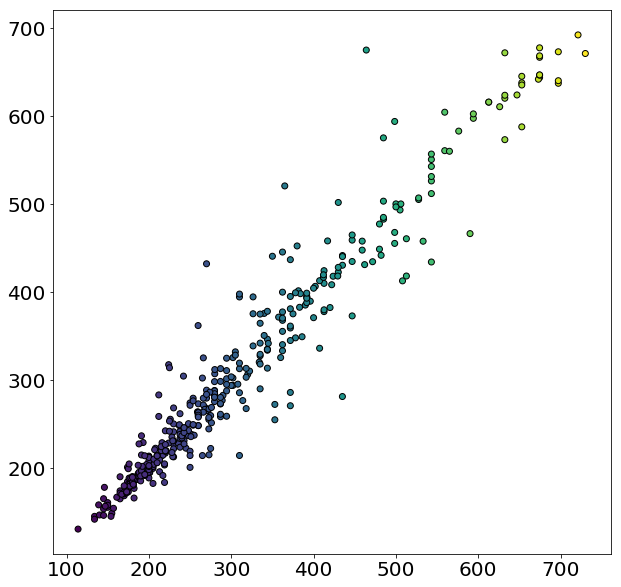

In [111]:
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [63]:
filename = 'model_RFR_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(test_corr) + '_test_r2_' + str(test_r2) + '_train_test_split_gridSearch.sav'
pickle.dump(rfr, open(filename, 'wb'))

In [99]:
kfold = model_selection.KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kfold.split(x, y):
    x_train, y_train = x.iloc[train], y.iloc[train]
    x_test, y_test = x.iloc[test], y.iloc[test]
    rfr = grid_search.best_estimator_
    rfr.fit(x_train, y_train)

    scores.append(print_and_return_score(x_test, y_test, rfr))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.91
R^2:  0.91
MAE:  27.37
MSE:  1606.35
Correlation  0.96


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.93
R^2:  0.93
MAE:  23.88
MSE:  1212.76
Correlation  0.97


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.92
R^2:  0.92
MAE:  29.12
MSE:  1728.83
Correlation  0.96


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.91
R^2:  0.91
MAE:  30.19
MSE:  1984.13
Correlation  0.95


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.9
R^2:  0.9
MAE:  26.72
MSE:  1852.67
Correlation  0.95


In [100]:
listScore = []
for i in range(5):
    tmp = []
    for j in range(5):
        tmp.append(scores[j][i])
    listScore.append(round(np.mean(tmp), 2))
    print(round(np.mean(tmp), 2))

0.91
0.91
27.46
1676.95
0.96


In [101]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, rfr)

Score:  0.89
R^2:  0.89
MAE:  29.53
MSE:  2078.07
Correlation  0.95


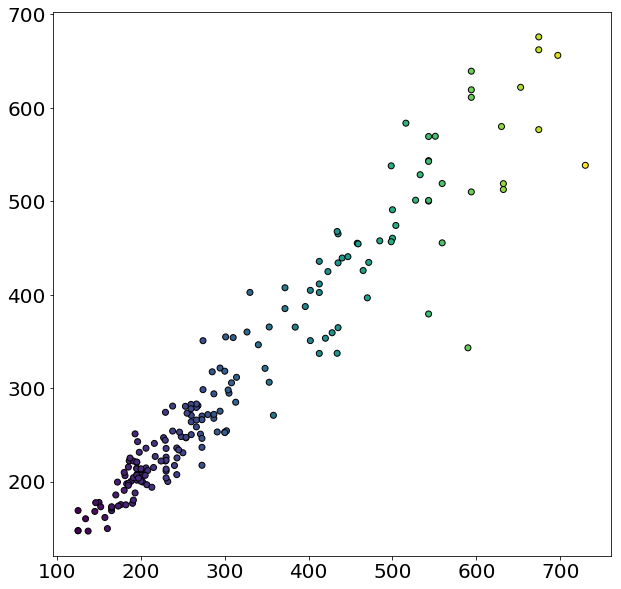

In [77]:
y_predict_test = rfr.predict(x_test)

plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

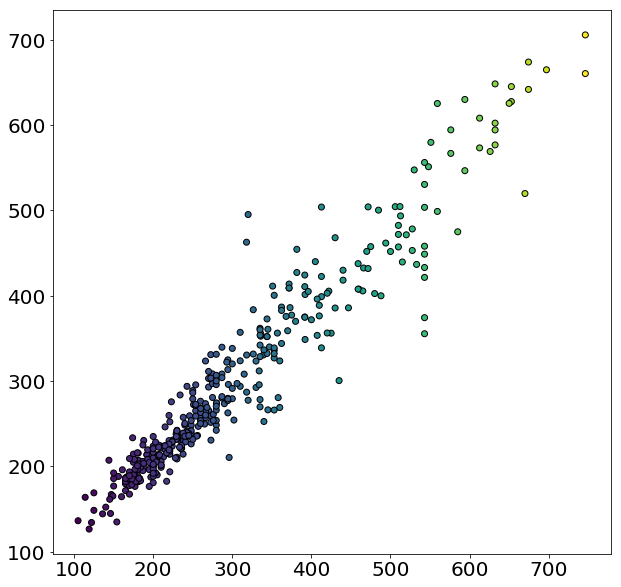

In [78]:
y_predict_valid = rfr.predict(x_valid)

plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [79]:
filename = 'model_RFR_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(listScore[4]) + '_test_r2_' + str(listScore[1]) + '_K_fold_GridSearch.sav'
pickle.dump(rfr, open(filename, 'wb'))

## Loaded_model 

In [30]:
loaded_model = pickle.load(open('model_RFR_corr_valid_0.9561486258289654_valid_r2_0.9101636386129961corr_test_0.95_test_r2_0.91_K_fold.sav', 'rb'))

In [36]:
ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)
x_train,  x_test,  y_train,  y_test  =  train_test_split (x, y, test_size=0.3)

In [37]:
result = loaded_model.score(x_test, y_test)
print(result)

0.9495484720495604


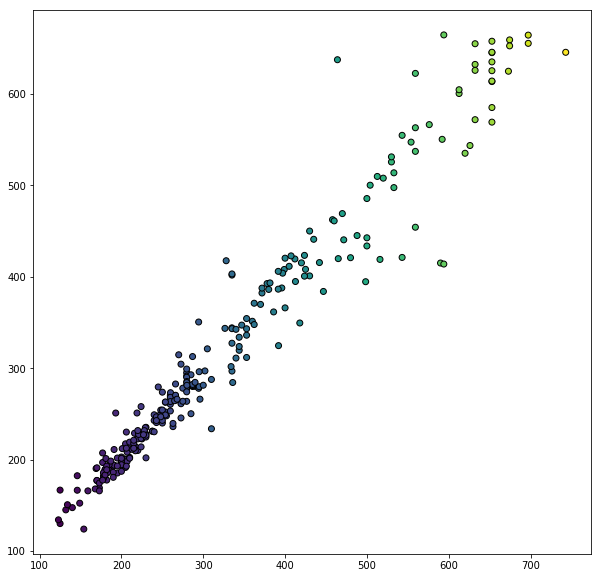

In [38]:
y_predict_test = loaded_model.predict(x_test)
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

In [39]:
result = loaded_model.score(x_valid, y_valid)
print(result)

0.944188600365109


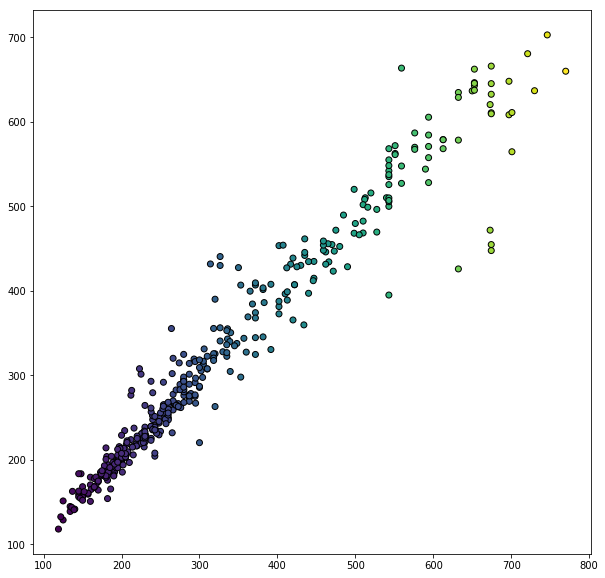

In [40]:
y_predict_valid = loaded_model.predict(x_valid)
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()